<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/korea/blob/main/EDA_air_pollution_in_seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction
```
"데이터 과학의 80%는 데이터 클리닝에 소비되고, 나머지 20%는 데이터 클리닝하는 시간을 불평하는데 쓰인다."
- Kaggle 창립자
```
그만큼 데이터 전처리에 들이는 노력이 상당합니다.

## EDA 탐색적 데이터 분석
---
### 데이터 출처와 주제에 대한 이해
- 서울의 공기 오염도 데이터
- [데이터 출처 : 서울  열린데이터 광장](https://data.seoul.go.kr/dataList/OA-15526/S/1/datasetView.do)

### 데이터의 구조 확인
- ```head()```로 데이터의 형태 확인
- ```shape```로 row * column 사이즈 확인
- ```isnull()```으로 결측치 확인
    - NA나 NULL값을 확인하고 제거 혹은 평균값 대입
    

### 데이터의 Feature 이해
1. 각 column이 무엇을 나타내고 있는지
    - Measurement date, Station code, Latitude, Longitude, PM2.5, PM10
    - 데이터의 범위 확인 max, min, meaㅜ


2. 속성간의 상관관계 확인
    - PM10 & PM2.5와 SO2, NO2, O3, CO2와의 상관관계
    - 시간별 미세먼지 농도


3. 시각화를 통해 모델에 적합한 데이터 추출

# 1. Library & Data Load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
'''라이브러리 불러오기'''
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
'''데이터 불러오기'''
df = pd.read_csv('/content/drive/MyDrive/한국분석/air_pollution_in_seoul/AirPollutionSeoul/Measurement_summary.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


# 2. Data

In [5]:
'''데이터의 차원'''
df.shape

(647511, 11)

In [6]:
'''Column 데이터 출력'''
df.columns.tolist()

['Measurement date',
 'Station code',
 'Address',
 'Latitude',
 'Longitude',
 'SO2',
 'NO2',
 'O3',
 'CO',
 'PM10',
 'PM2.5']

In [7]:
'''데이터 정보'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [8]:
'''결측치 확인'''
pd.isnull(df)
df.isnull().sum()

,0
Measurement date,0
Station code,0
Address,0
Latitude,0
Longitude,0
SO2,0
NO2,0
O3,0
CO,0
PM10,0


In [9]:
'''각 열들의 고유값 정보 출력'''
df.nunique()

,0
Measurement date,25906
Station code,25
Address,25
Latitude,25
Longitude,25
SO2,186
NO2,132
O3,253
CO,172
PM10,551


In [10]:
'''중복된 데이터 확인'''
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
647506,False
647507,False
647508,False
647509,False


# 3.1. 위도 & 경도 데이터

In [11]:
# 위도 경도 DataFrame
location = df.groupby('Station code')['PM10'].agg([np.mean])
location['Latitude'] = df['Latitude'].unique() # 절대 이렇게 코드짜면 안되요!
location['Longitude'] = df['Longitude'].unique()
location.head()

<ipython-input-11-72f461a0b840>:2: FutureWarning: The provided callable <function mean at 0x7d646b93fd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  location = df.groupby('Station code')['PM10'].agg([np.mean])


,mean,Latitude,Longitude
Station code,,,
101,37.965605,37.572016,127.005008
102,37.970469,37.564263,126.974676
103,35.539183,37.540033,127.004850
104,42.328468,37.609823,126.934848
105,41.437737,37.593742,126.949679


In [12]:
import folium
from folium.plugins import MarkerCluster

# PM10에 따른 color 변화
def color_select(x):
    if x >= 45:
        return 'red'
    elif x >= 40:
        return 'yellow'
    else:
        return 'blue'

# Map
seoul = folium.Map(location=[37.55138077230307, 126.98712254969668], zoom_start=12)

# Circle
for i in range(len(location)):
    # 관측소
    folium.Circle(location=[location.iloc[i,1], location.iloc[i,2]], radius = location.iloc[i, 0]*30, color=color_select(location.iloc[i,0]),fill_color='#ffffgg').add_to(seoul)

# Marker / Sejong Univ.
folium.Marker([37.55195608145124, 127.07362532752212], icon=folium.Icon(popup='Sejoing Univ.', color='red', icon='glyphicon glyphicon-home')).add_to(seoul)
seoul

# 3.2. 시간별 미세먼지 농도

In [14]:
from datetime import datetime

df['Measurement date'] = df['Measurement date'].astype('datetime64[ns]')
df['hour'] = df.loc[:, "Measurement date"].dt.hour
df = df.drop('Measurement date', axis=1)


In [15]:
data = df.groupby('hour', as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
data

,hour,SO2,NO2,O3,CO,PM10,PM2.5
0,0,-0.001909,0.024584,0.011626,0.529891,41.944368,24.651817
1,1,-0.002126,0.021533,0.012065,0.524424,40.927181,24.091507
2,2,-0.002047,0.019609,0.012448,0.516841,40.558962,24.103003
3,3,-0.002203,0.018209,0.012198,0.509860,39.303351,23.577686
4,4,-0.002267,0.018247,0.011033,0.507101,39.394380,23.785717
5,5,-0.002303,0.020649,0.008226,0.515338,39.018339,23.413360
6,6,-0.001988,0.025026,0.005753,0.536940,40.044229,23.788876
7,7,-0.001966,0.027204,0.005840,0.562405,40.911421,23.670649
8,8,-0.001507,0.028721,0.008698,0.576376,43.231577,24.484415
9,9,-0.001398,0.027778,0.014076,0.559335,44.089890,24.593978


<Axes: xlabel='hour'>

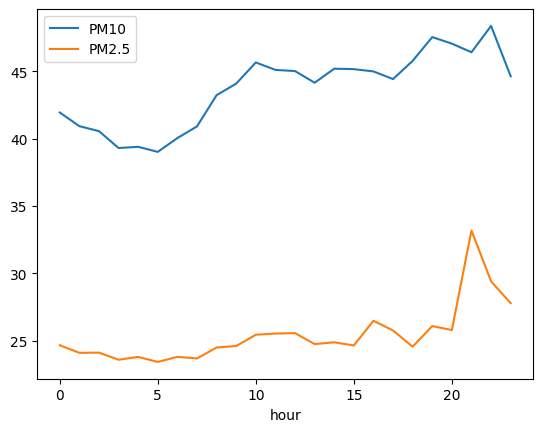

In [16]:
# 미세먼지 농도변화 Hour
data.plot(x='hour', y=['PM10', 'PM2.5'])

### 3.2.1. 세종대 주변 미세먼지 농도

In [17]:
df_sj = pd.read_csv('/content/drive/MyDrive/한국분석/air_pollution_in_seoul/AirPollutionSeoul/Measurement_summary.csv')
## 데이터 다시 가저오기
df_sj.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [18]:
df_sj_date = df_sj['Measurement date'].str.split(" ",n=1,expand=True)
## 시간 날짜를 분리
df_sj_date.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [19]:
df_sj['date'] = df_sj_date[0]
df_sj['time'] = df_sj_date[1]
df_sj = df_sj.drop(['Measurement date'],axis = 1)
df_sj.head()
## 시간 날짜 붙여놓고, 쓸모없는 데이터 버리기

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00
2,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00
3,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00
4,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00


In [20]:
condition = (df_sj.date == '2019-04-03')
df_birth = df_sj[condition]
df_birth.head()
## 특정 시간 기준으로 추출

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
19505,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.026,0.035,0.4,30.0,18.0,2019-04-03,00:00
19506,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.026,0.033,0.5,29.0,17.0,2019-04-03,01:00
19507,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.025,0.035,0.5,31.0,21.0,2019-04-03,02:00
19508,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.022,0.036,0.4,27.0,15.0,2019-04-03,03:00
19509,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.029,0.028,0.5,27.0,15.0,2019-04-03,04:00


In [21]:
cheak = df_birth['Address'].unique()
cheak
## 세종대 주변 위치 찾기

array(['19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea',
       '15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea',
       '136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea',
       '215, Jinheung-ro, Eunpyeong-gu, Seoul, Republic of Korea',
       '32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul, Republic of Korea',
       '10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea',
       '18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Republic of Korea',
       '571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea',
       '43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea',
       '369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea',
       '70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea',
       '49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea',
       '34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republic of Korea',
       '17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea',
       '56, Jungang-ro 52-gil, Yangc

In [22]:
condition = (df_birth.Address == '571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea')
df_add = df_birth[condition]
df_add.head()
## 광진구 기준으로 데이터 추출

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
200801,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.54718,127.092493,0.004,0.029,0.027,0.6,31.0,24.0,2019-04-03,00:00
200802,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.54718,127.092493,0.004,0.026,0.029,0.6,31.0,18.0,2019-04-03,01:00
200803,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.54718,127.092493,0.004,0.021,0.035,0.6,26.0,18.0,2019-04-03,02:00
200804,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.54718,127.092493,0.004,0.025,0.028,0.6,28.0,21.0,2019-04-03,03:00
200805,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.54718,127.092493,0.004,0.043,0.004,0.7,34.0,24.0,2019-04-03,04:00


In [23]:
df_add = df_add.loc[:,['SO2','NO2','O3','CO','PM10','PM2.5','time']]
df_add.head()
## 원하는 컬럼들로만 데이터프레임 다시 만들기

,SO2,NO2,O3,CO,PM10,PM2.5,time
200801,0.004,0.029,0.027,0.6,31.0,24.0,00:00
200802,0.004,0.026,0.029,0.6,31.0,18.0,01:00
200803,0.004,0.021,0.035,0.6,26.0,18.0,02:00
200804,0.004,0.025,0.028,0.6,28.0,21.0,03:00
200805,0.004,0.043,0.004,0.7,34.0,24.0,04:00


In [24]:
X_sj = df_add['time']
Y_sj = df_add['PM10']
Y2_sj = df_add['PM2.5']
## 그래프에 나타낼 데이터 추출하기

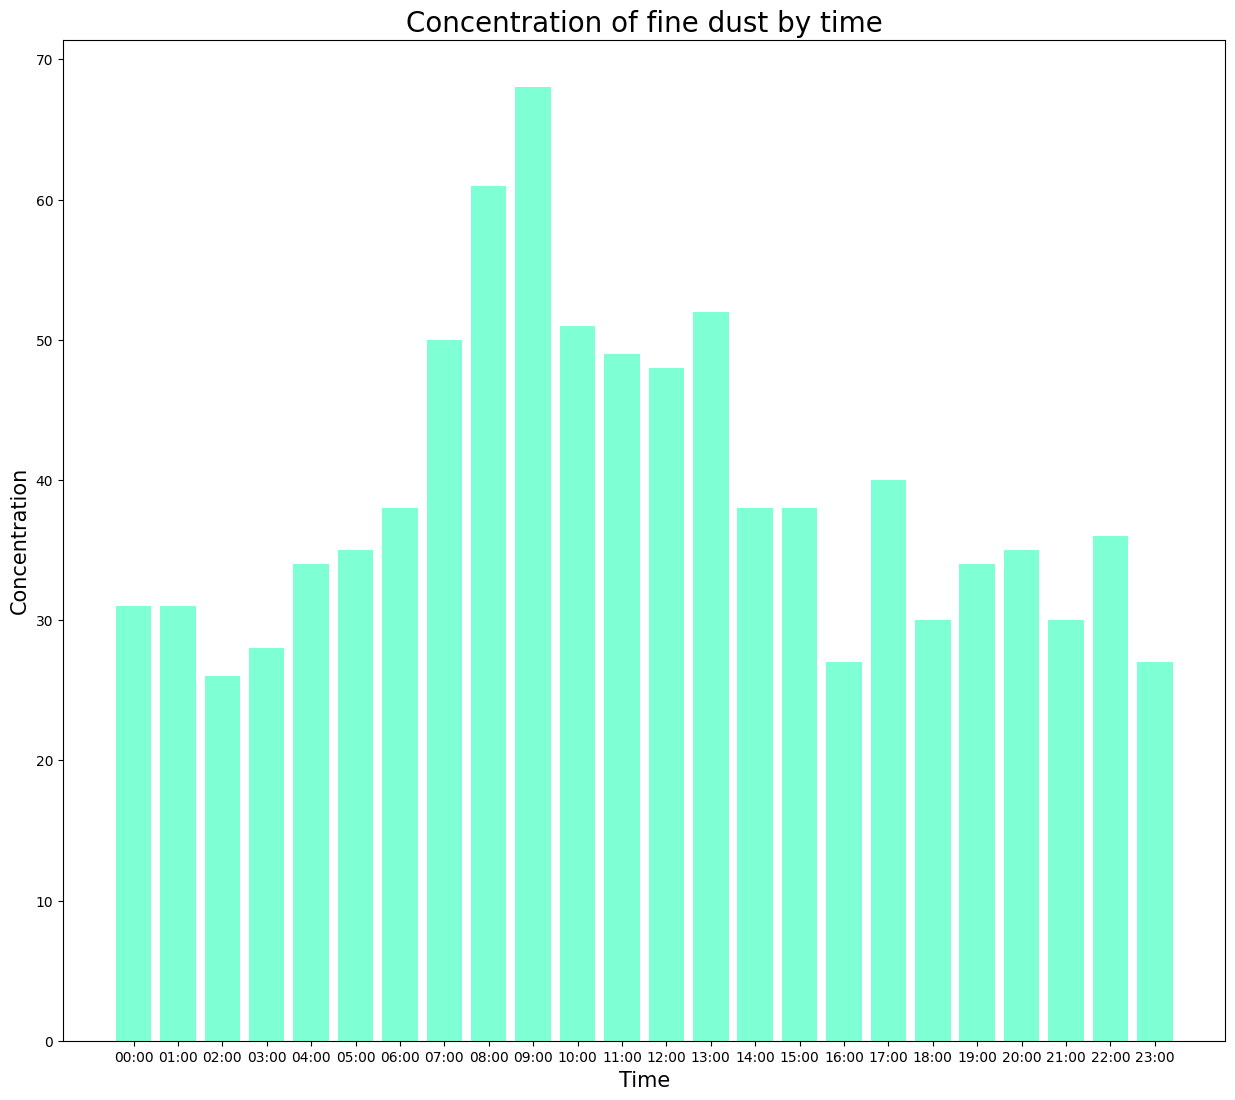

In [25]:
plt.figure(figsize = (15,13))
plt.bar(X_sj,Y_sj,color = 'aquamarine')
plt.title('Concentration of fine dust by time',fontsize = 20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Concentration',fontsize = 15)
plt.show()

## 세종대 주변 시간별 미세먼지 그래프

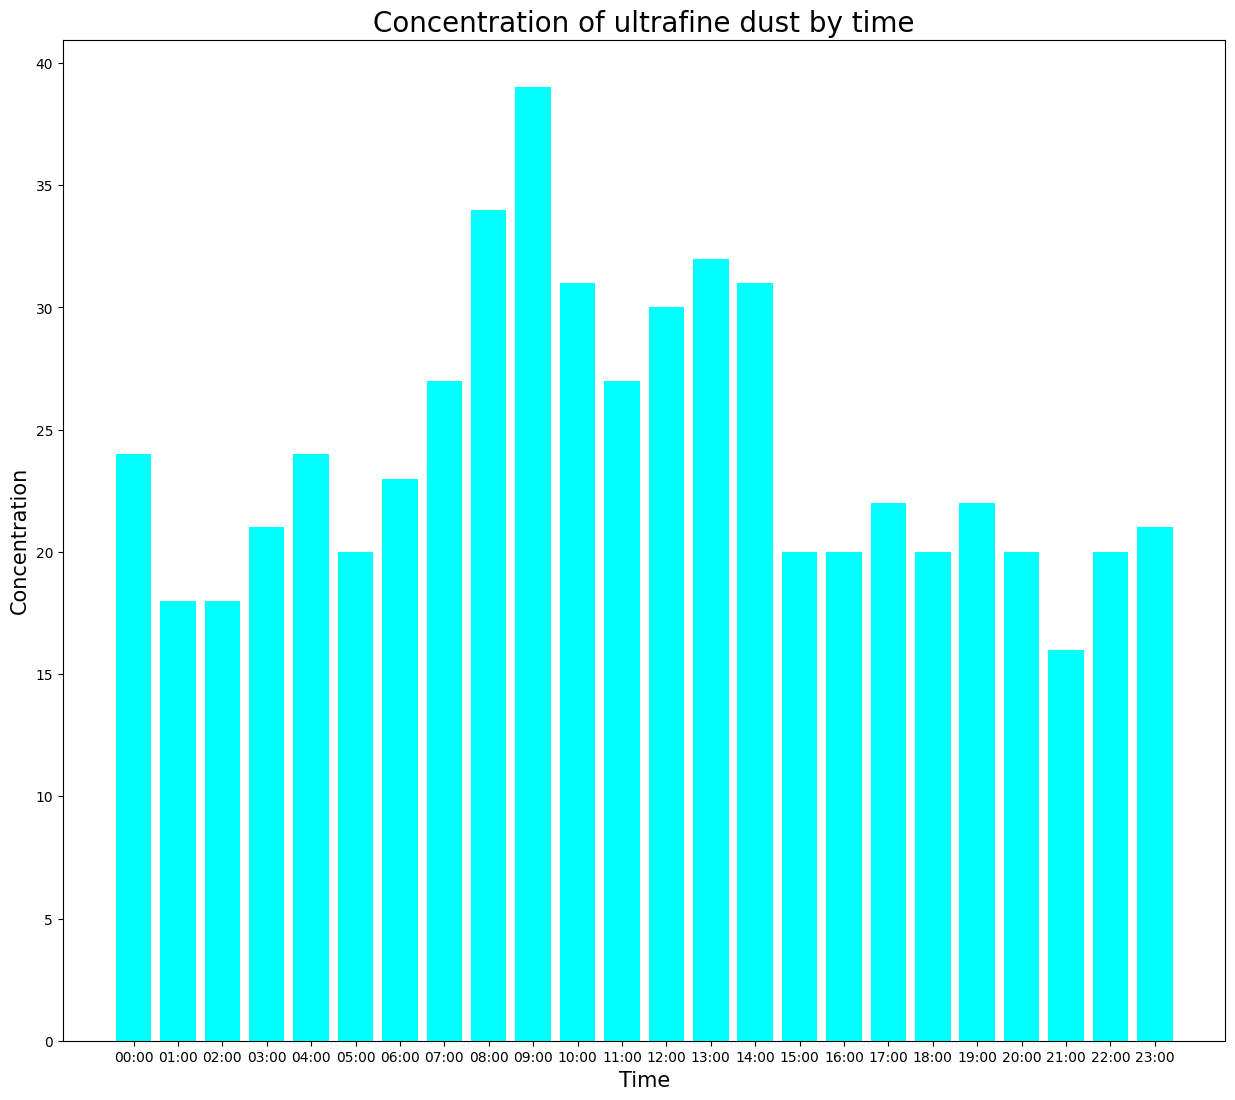

In [26]:
plt.figure(figsize = (15,13))
plt.bar(X_sj,Y2_sj,color = 'cyan')
plt.title('Concentration of ultrafine dust by time',fontsize = 20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Concentration',fontsize = 15)
plt.show()

## 세종대 주변 시간별 초미세먼지 시간별 그래프

# 3.3. 지역별 미세먼지 농도

### SO2

In [27]:
'''SO2 비율이 높은 정보 10개 출력'''
SO2 = df.sort_values(by = ['SO2'], ascending=False)
SO2.head(10)

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour
424709,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,3.736,38.445,12.455,0.4,35.0,17.0,9
424686,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,2.700,20.100,33.600,0.3,8.0,1.0,10
424685,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,2.700,30.700,23.400,0.4,5.0,6.0,9
424710,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,1.330,12.805,6.320,0.5,34.0,15.0,10
15589,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.406,0.044,0.003,40.0,22.0,12.0,13
644605,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.378,-1.000,0.002,36.7,14.0,1.0,14
15565,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.372,0.030,0.030,38.4,15.0,4.0,13
589026,123,"426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...",37.517528,127.047470,0.370,0.002,0.013,7.1,48.0,30.0,11
537080,121,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",37.487355,126.927102,0.365,0.001,0.012,36.8,57.0,42.0,13
589001,123,"426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...",37.517528,127.047470,0.350,0.005,0.008,5.2,36.0,27.0,10


In [28]:
SO2_Address = df.groupby('Address').agg({'SO2' : 'median'}).sort_values('SO2',ascending=False).reset_index()
# Address를 기준으로 그룹화하여 SO2 집단별 평균으로 내림차순으로 정렬
# reset_index -> 인덱스 리셋(단순한 정수 인덱스로 세팅)
print(SO2_Address)

                                              Address    SO2
0   369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...  0.006
1   71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...  0.005
2   45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...  0.005
3   43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...  0.005
4   426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...  0.005
5   236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...  0.004
6   59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  0.004
7   571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...  0.004
8   56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...  0.004
9   34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...  0.004
10  11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...  0.004
11  10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...  0.004
12  215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  0.004
13  20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  0.004
14  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  0.004
15  18, Ttukseom-ro 3-gi

중랑구 용마산로의 **SO2 비율**이 가장 높은 것을 볼 수 있습니다.



In [29]:
# 상위 10개 데이터만 저장
SO2 = SO2_Address.sort_values('SO2',ascending=False).head(10)

### NO2

In [30]:
'''NO2 비율이 높은 정보 10개 출력'''
NO2 = df.sort_values(by = ['NO2'], ascending=False)
NO2.head(10)

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour
424709,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,3.736,38.445,12.455,0.4,35.0,17.0,9
424684,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,0.000,37.500,0.000,0.0,0.0,0.0,8
424685,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,2.700,30.700,23.400,0.4,5.0,6.0,9
424686,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,2.700,20.100,33.600,0.3,8.0,1.0,10
424710,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,1.330,12.805,6.320,0.5,34.0,15.0,10
485104,119,"11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...",37.525007,126.897370,0.010,0.310,0.035,1.1,74.0,51.0,17
30138,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.003,0.248,0.014,0.6,22.0,17.0,9
471862,119,"11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...",37.525007,126.897370,0.004,0.235,0.012,1.0,33.0,10.0,22
29944,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.008,0.144,0.015,0.5,36.0,25.0,7
193022,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.276,0.135,0.031,26.9,985.0,985.0,14


In [31]:
NO2_Address = df.groupby('Address').agg({'NO2' : 'median'}).sort_values('NO2',ascending=False).reset_index()
# Address를 기준으로 그룹화하여 NO2 집단별 평균으로 내림차순으로 정렬
# reset_index -> 인덱스 리셋(단순한 정수 인덱스로 세팅)
print(NO2_Address)

                                              Address    NO2
0   15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  0.030
1   19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  0.028
2   136, Hannam-daero, Yongsan-gu, Seoul, Republic...  0.028
3   70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...  0.028
4   56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...  0.028
5   236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...  0.027
6   11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...  0.027
7   20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  0.027
8   426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...  0.026
9   59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  0.026
10  71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...  0.026
11  6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...  0.026
12  18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...  0.026
13  16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...  0.026
14  14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...  0.026
15  43, Cheonho-daero 13

중구 덕수궁길의 **NO2 비율**이 가장 높은 것을 볼 수 있습니다.

In [32]:
# 상위 10개 데이터만 저장
NO2 = NO2_Address.sort_values('NO2',ascending=False).head(10)

### O3

In [33]:
'''O3 비율이 높은 정보 10개 출력'''
O3 = df.sort_values(by = ['O3'], ascending=False)
O3.head(10)

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour
424686,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,2.700,20.100,33.600,0.3,8.0,1.0,10
424685,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,2.700,30.700,23.400,0.4,5.0,6.0,9
424709,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,3.736,38.445,12.455,0.4,35.0,17.0,9
424710,117,"45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...",37.498498,126.889692,1.330,12.805,6.320,0.5,34.0,15.0,10
263389,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.002,0.021,5.297,0.4,14.0,8.0,21
263386,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.003,0.026,1.901,0.5,36.0,29.0,18
263387,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.003,0.022,1.826,0.4,33.0,28.0,19
566208,122,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",37.504547,126.994458,0.004,0.023,1.346,0.3,12.0,10.0,23
566206,122,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",37.504547,126.994458,0.004,0.016,1.254,0.2,21.0,15.0,21
566207,122,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",37.504547,126.994458,0.004,0.016,1.147,0.2,15.0,985.0,22


In [34]:
O3_Address = df.groupby('Address').agg({'O3' : 'median'}).sort_values('O3',ascending=False).reset_index()
# Address를 기준으로 그룹화하여 O3 집단별 평균으로 내림차순으로 정렬
# reset_index -> 인덱스 리셋(단순한 정수 인덱스로 세팅)
print(O3_Address)

                                              Address     O3
0   49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...  0.027
1   215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  0.025
2   34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...  0.025
3   32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  0.023
4   71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...  0.023
5   16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...  0.022
6   6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...  0.022
7   19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  0.022
8   45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...  0.022
9   15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  0.022
10  17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...  0.021
11  10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...  0.021
12  20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  0.021
13  369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...  0.020
14  571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...  0.020
15  70, Samyang-ro 2-gil

강북구 삼양로 139길 지역에서 **O3 비율** 이 높은 것을 알 수 있다.

In [35]:
# 상위 10개 데이터만 저장
O3 = O3_Address.sort_values('O3',ascending=False).head(10)

### CO

In [36]:
'''CO 비율이 높은 정보 10개 출력'''
CO = df.sort_values(by = ['CO'], ascending=False)
CO.head(10)

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour
311153,113,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",37.654192,127.029088,0.003,0.030,0.011,71.7,38.0,9.0,20
311154,113,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",37.654192,127.029088,0.003,0.019,0.019,69.1,31.0,16.0,21
311155,113,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",37.654192,127.029088,0.004,0.038,0.009,59.3,41.0,20.0,22
311152,113,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",37.654192,127.029088,0.003,0.039,0.008,47.2,30.0,21.0,19
15589,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.406,0.044,0.003,40.0,22.0,12.0,13
15565,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.372,0.030,0.030,38.4,15.0,4.0,13
193021,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.342,0.004,0.004,37.5,0.0,985.0,13
537080,121,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",37.487355,126.927102,0.365,0.001,0.012,36.8,57.0,42.0,13
644605,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.378,-1.000,0.002,36.7,14.0,1.0,14
192350,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.342,0.002,0.336,33.4,316.0,47.0,14


In [37]:
CO_Address = df.groupby('Address').agg({'CO' : 'median'}).sort_values('CO',ascending=False).reset_index()
# Address를 기준으로 그룹화하여 CO 집단별 평균으로 내림차순으로 정렬
# reset_index -> 인덱스 리셋(단순한 정수 인덱스로 세팅)
print(CO_Address)

                                              Address   CO
0   70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...  0.6
1   571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...  0.6
2   10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...  0.5
3   215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  0.5
4   59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  0.5
5   56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...  0.5
6   43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...  0.5
7   34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...  0.5
8   11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...  0.5
9   236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...  0.5
10  32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  0.5
11  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  0.5
12  17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...  0.5
13  15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  0.5
14  20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  0.4
15  18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...  0

성북구 삼양로 2길 지역에서 **CO 비율** 이 높은 것을 알 수 있다.

In [38]:
# 상위 10개 데이터만 저장
CO = CO_Address.sort_values('CO',ascending=False).head(10)

### PM10

In [39]:
'''PM10 비율이 높은 정보 10개 출력'''
PM10 = df.sort_values(by = ['PM10'], ascending=False)
PM10.head(10)

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour
397291,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.007,0.058,0.003,1.1,3586.0,23.0,9
397290,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.005,0.059,0.002,1.3,3577.0,28.0,8
397289,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.005,0.057,0.002,1.3,3568.0,23.0,7
397288,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.005,0.055,0.002,1.2,3561.0,19.0,6
397287,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.004,0.048,0.002,1.1,3556.0,16.0,5
397286,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.004,0.052,0.003,1.3,3552.0,15.0,4
397285,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.005,0.051,0.002,0.9,3545.0,18.0,3
397284,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.008,0.054,0.002,0.9,3540.0,13.0,2
397283,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.006,0.056,0.002,0.9,3533.0,14.0,1
397282,116,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",37.54464,126.835151,0.005,0.069,0.002,1.2,3527.0,23.0,0


In [40]:
PM10_Address = df.groupby('Address').agg({'PM10' : 'median'}).sort_values('PM10',ascending=False).reset_index()
# Address를 기준으로 그룹화하여 PM3 집단별 평균으로 내림차순으로 정렬
# reset_index -> 인덱스 리셋(단순한 정수 인덱스로 세팅)
print(PM10_Address)

                                              Address  PM10
0   11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...  41.0
1   59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  39.0
2   70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...  38.0
3   18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...  38.0
4   71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...  37.0
5   14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...  37.0
6   16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...  37.0
7   6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...  36.0
8   56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...  36.0
9   45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...  36.0
10  10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...  36.0
11  236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...  35.0
12  215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  35.0
13  571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...  35.0
14  17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...  35.0
15  34, Sirubong-ro 2-gil, Dobong-gu, Se

영동포구 양산로 23길 지역에서 **PM10 비율** 이 높은 것을 알 수 있다.

In [41]:
# 상위 10개 데이터만 저장
PM10 = PM10_Address.sort_values('PM10',ascending=False).head(10)

### PM2.5


In [42]:
'''PM2.5 비율이 높은 정보 10개 출력'''
PM2_5 = df.sort_values(by = ['PM2.5'], ascending=False)
PM2_5.head(10)

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour
62770,103,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850,0.004,0.018,0.048,0.3,68.0,6256.0,16
281354,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.003,0.028,0.033,0.6,33.0,995.0,13
281426,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.003,0.025,0.048,0.5,985.0,995.0,13
140880,106,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597,0.005,0.054,0.001,0.7,77.0,985.0,4
535694,121,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",37.487355,126.927102,0.004,0.020,0.022,0.3,77.0,985.0,19
480333,119,"11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...",37.525007,126.897370,0.004,0.017,0.059,0.5,29.0,985.0,21
557811,122,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",37.504547,126.994458,0.004,0.022,0.031,0.3,27.0,985.0,22
535697,121,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",37.487355,126.927102,0.005,0.031,0.014,0.4,43.0,985.0,22
204268,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.004,0.015,0.038,0.7,26.0,985.0,22
205881,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.003,0.037,0.015,0.8,44.0,985.0,23


In [43]:
PM2_5_Address = df.groupby('Address').agg({'PM2.5' : 'median'}).sort_values('PM2.5',ascending=False).reset_index()
# Address를 기준으로 그룹화하여 PM2.5 집단별 평균으로 내림차순으로 정렬
# reset_index -> 인덱스 리셋(단순한 정수 인덱스로 세팅)
print(PM2_5_Address)

                                              Address  PM2.5
0   11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...   22.0
1   10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...   21.0
2   14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...   21.0
3   56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...   21.0
4   6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...   20.0
5   59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...   20.0
6   17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...   20.0
7   18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...   20.0
8   20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...   20.0
9   215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...   20.0
10  426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...   19.0
11  70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...   19.0
12  571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...   19.0
13  45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...   19.0
14  71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...   19.0
15  16, Sinbanpo-ro 15-g

영동포구 양산로 23길 지역에서 **PM2.5 비율**이 높은 것을 알 수 있다.

In [44]:
# 상위 10개 데이터만 저장
PM2_5 = PM2_5_Address.sort_values('PM2.5',ascending=False).head(10)

<Axes: xlabel='PM2.5', ylabel='Address'>

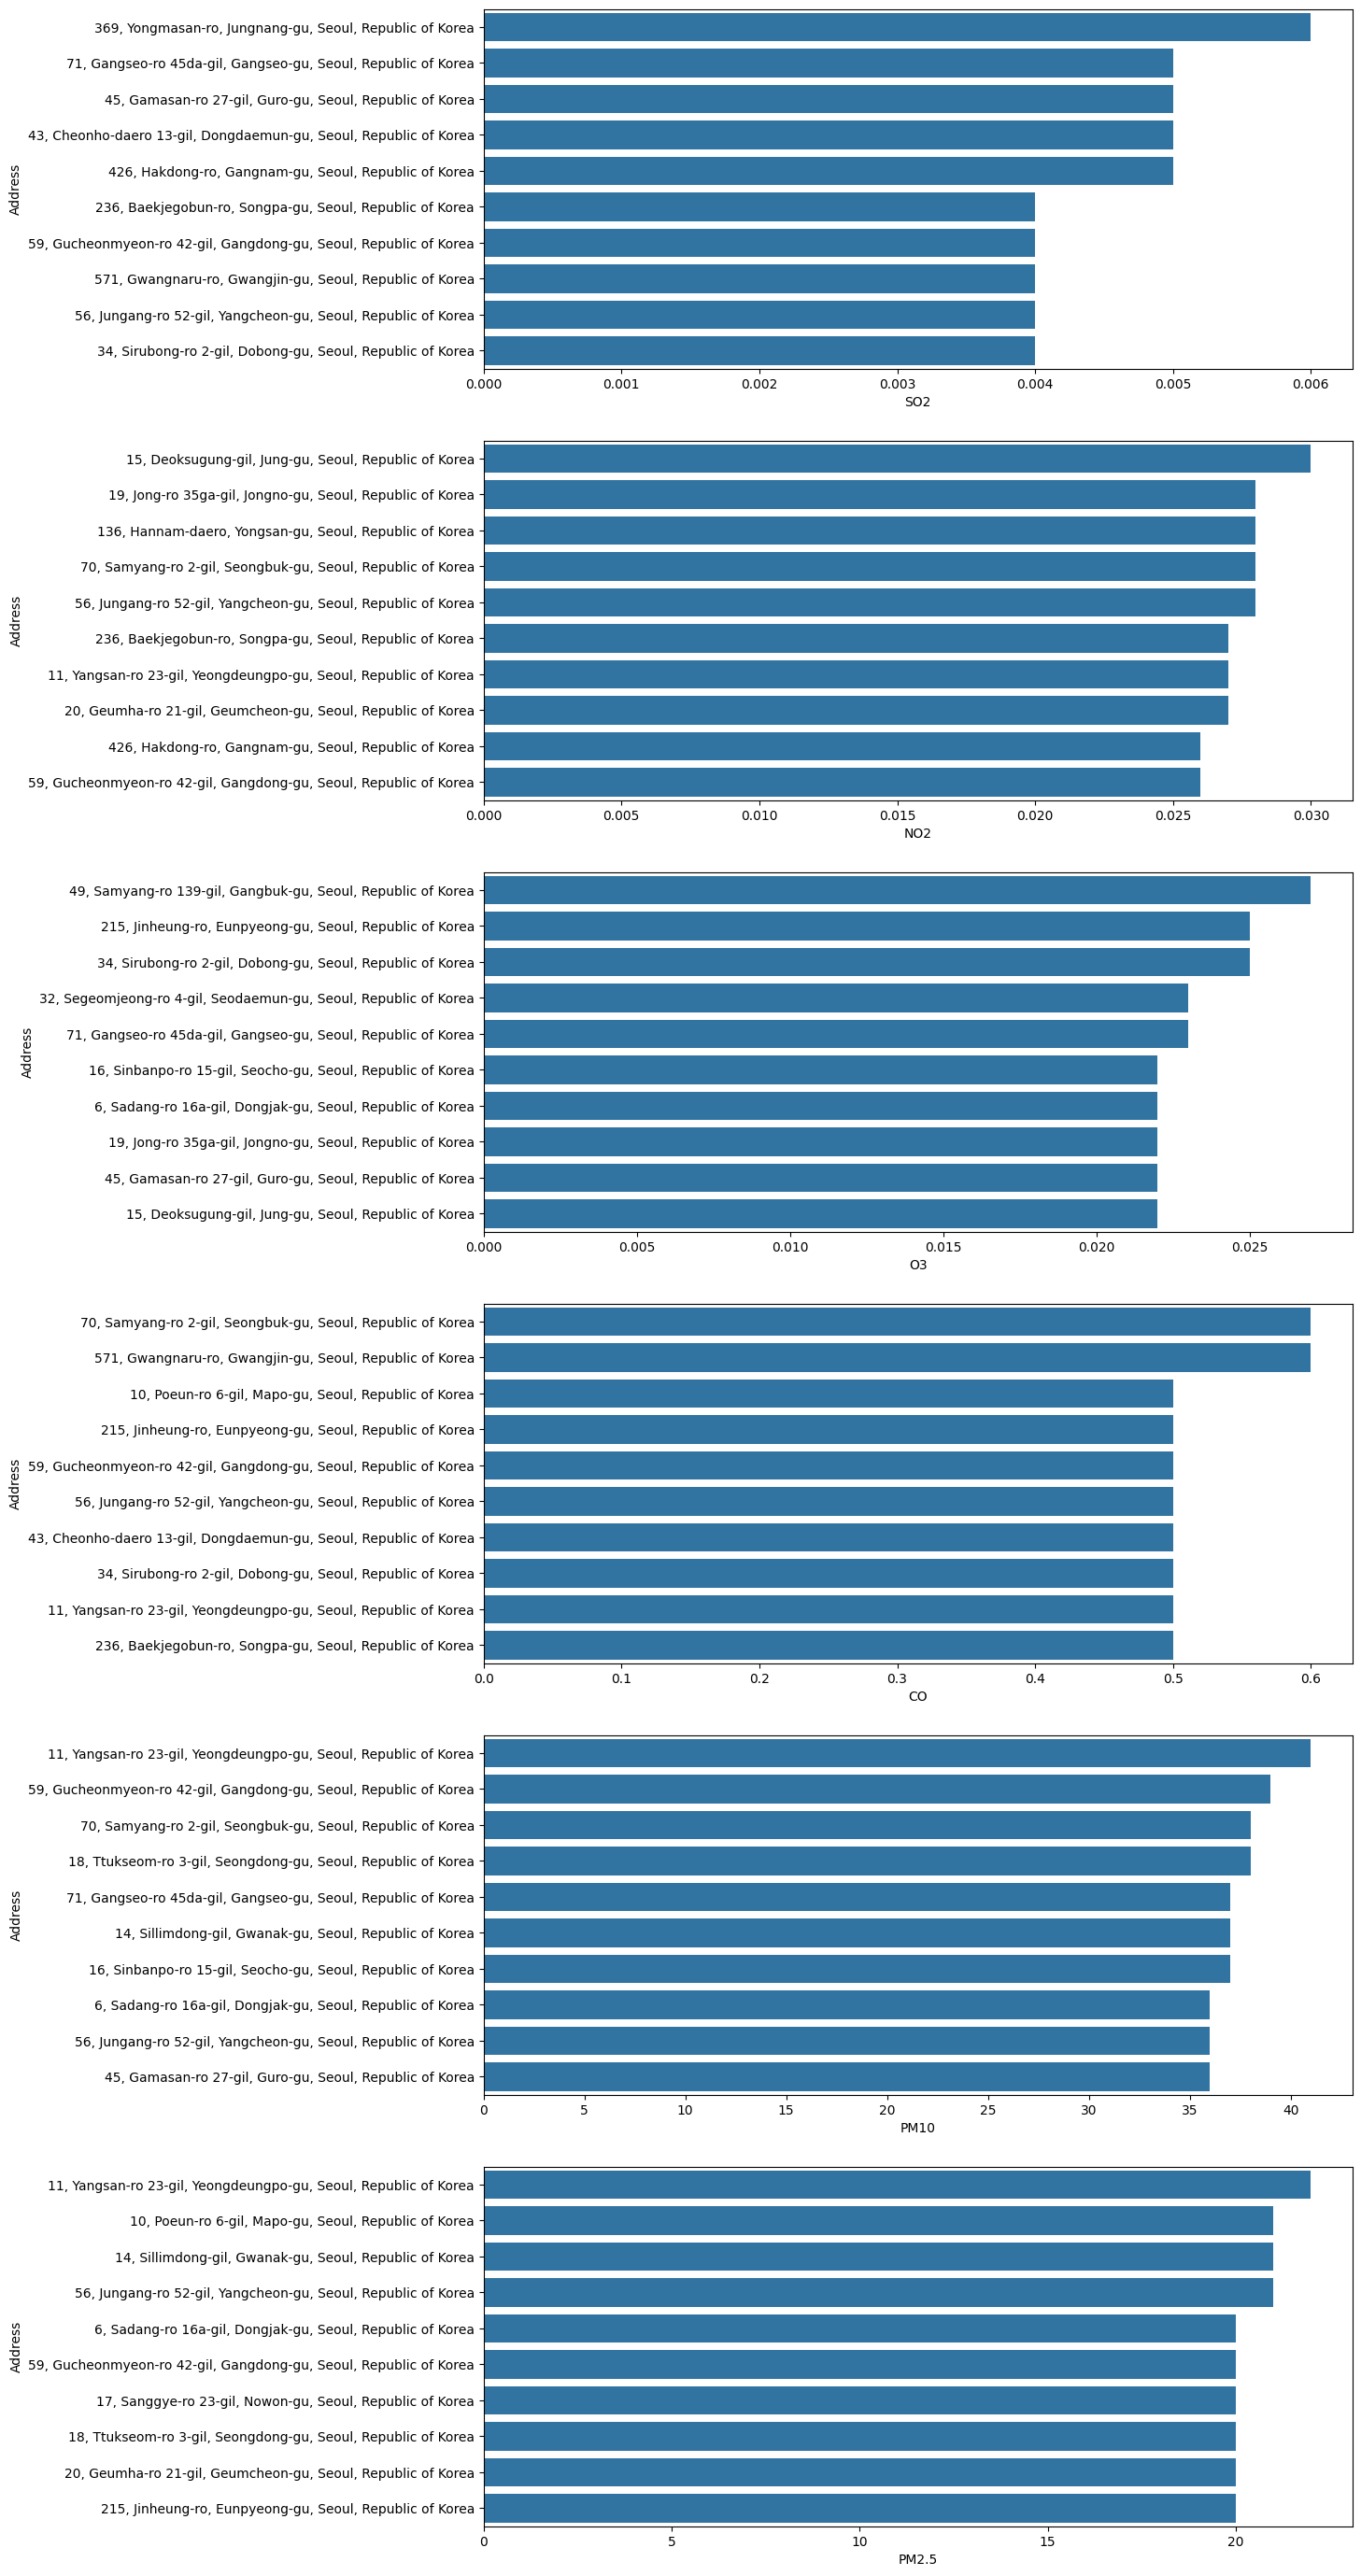

In [45]:
plt.figure(figsize=(12,35))

plt.subplot(6,1,1)
sns.barplot(y="Address", x="SO2", data = SO2_Address.head(10))

plt.subplot(6,1,2)
sns.barplot(y="Address", x="NO2", data = NO2_Address.head(10))

plt.subplot(6,1,3)
sns.barplot(y="Address", x="O3", data = O3_Address.head(10))

plt.subplot(6,1,4)
sns.barplot(y="Address", x="CO", data = CO_Address.head(10))

plt.subplot(6,1,5)
sns.barplot(y="Address", x="PM10", data = PM10_Address.head(10))

plt.subplot(6,1,6)
sns.barplot(y="Address", x="PM2.5", data = PM2_5_Address.head(10))

# 3.4. 미세먼지 상관관계

데이터를 새로 가져와줍니다.

In [47]:
df_summary = pd.read_csv('/content/drive/MyDrive/한국분석/air_pollution_in_seoul/AirPollutionSeoul/Measurement_summary.csv')
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [48]:
df_date = df_summary['Measurement date'].str.split(" ", n=1, expand=True)
df_date.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [49]:
df_summary['date'] = df_date[0]
df_summary['time'] = df_date[1]
df_summary = df_summary.drop(['Measurement date'], axis=1)
df_summary.head()

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00
2,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00
3,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00
4,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00


In [50]:
df_0 = df_summary.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_0.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


**corr()을 이용해서 상관계수 계산하기**

In [52]:
# Convert 'date' column to datetime objects
df_0['date'] = pd.to_datetime(df_0['date'])

# Extract numerical features from the date
df_0['dayofweek'] = df_0['date'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
# ... add other relevant features like month, year, etc. if needed ...

# Now drop the original 'date' column as it's no longer needed for correlation
df_0 = df_0.drop('date', axis=1)

# Calculate the correlation matrix
df_air = df_0.corr()
df_air

,SO2,NO2,O3,CO,PM10,PM2.5,dayofweek
SO2,1.000000,0.861667,0.844693,0.234264,0.151687,0.125017,0.005562
NO2,0.861667,1.000000,0.650407,0.573334,0.362489,0.381048,-0.033624
O3,0.844693,0.650407,1.000000,-0.048180,0.106887,0.060999,0.042646
CO,0.234264,0.573334,-0.048180,1.000000,0.642527,0.751510,-0.003346
PM10,0.151687,0.362489,0.106887,0.642527,1.000000,0.807851,-0.019680
PM2.5,0.125017,0.381048,0.060999,0.751510,0.807851,1.000000,-0.016265
dayofweek,0.005562,-0.033624,0.042646,-0.003346,-0.019680,-0.016265,1.000000


index와 columns 가 동일한 값으로 들어있는 것을 볼 수 있음.
​

A와 B 의 상관계수가 1에 가까워질 수록, 하나가 증가할때 다른 하나도 함께 증가하는 경향이 나타나고, -1에 가까워질 수록 하나가 증가하면 다른 하나가 감소하는 경향이 있다는 의미.

row번호와 column 번호가 동일할때에는, 자신에 대한 상관계수 이므로 항상 1이 나옴. (항상 함께 증가 or 함께 감소)

**히트맵**

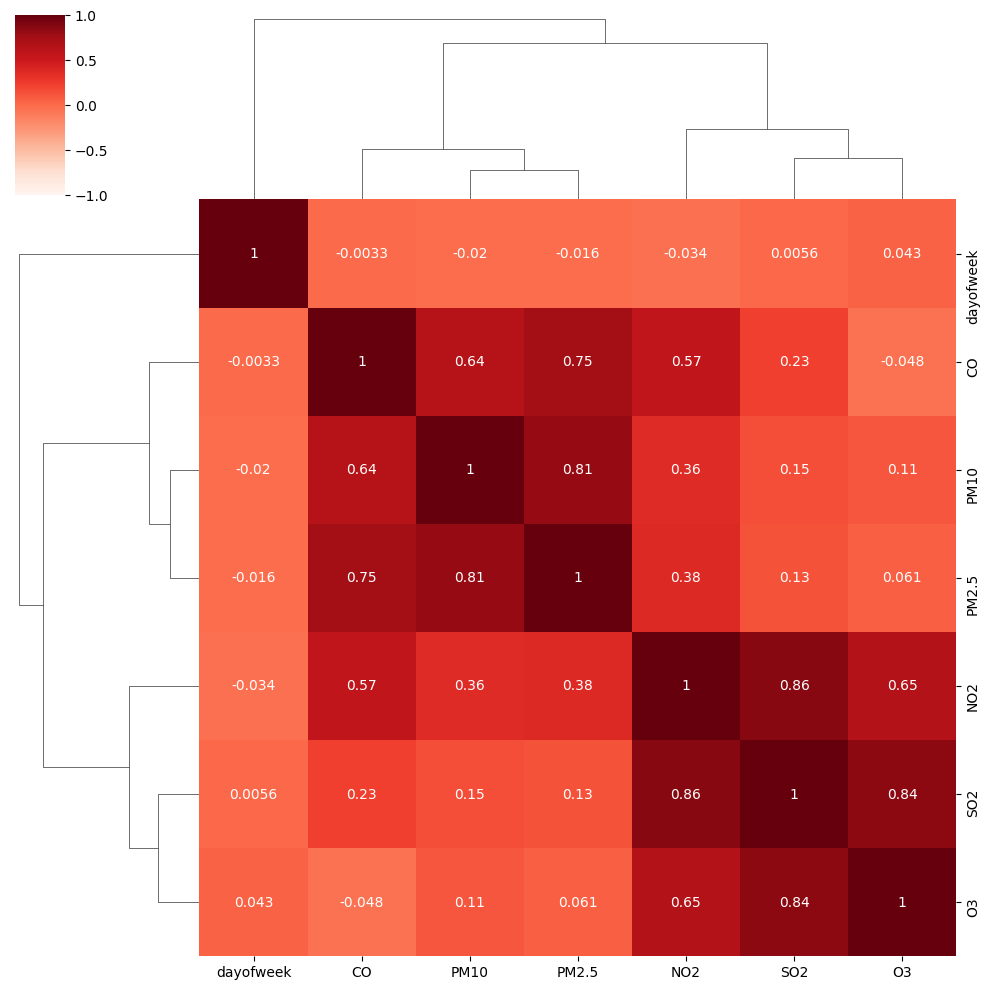

In [53]:
sns.clustermap(df_air,
               annot = True,
               cmap = 'Reds',
               vmin = -1, vmax = 1
              )

sns.clustermap() 을 활용하면, sns.heatmap 을 사용한 것과 동일하게 색상으로 나타내주고, 행과 열별로 비슷한 항목들을 묶어줌.

위의 clustermap을 보면 PM10(미세먼지) 농도가 높을 때, 대체로 PM2.5(초미세먼지)의 농도도 높은 상관관계 등을 알 수 있다.

**산점도**

[]

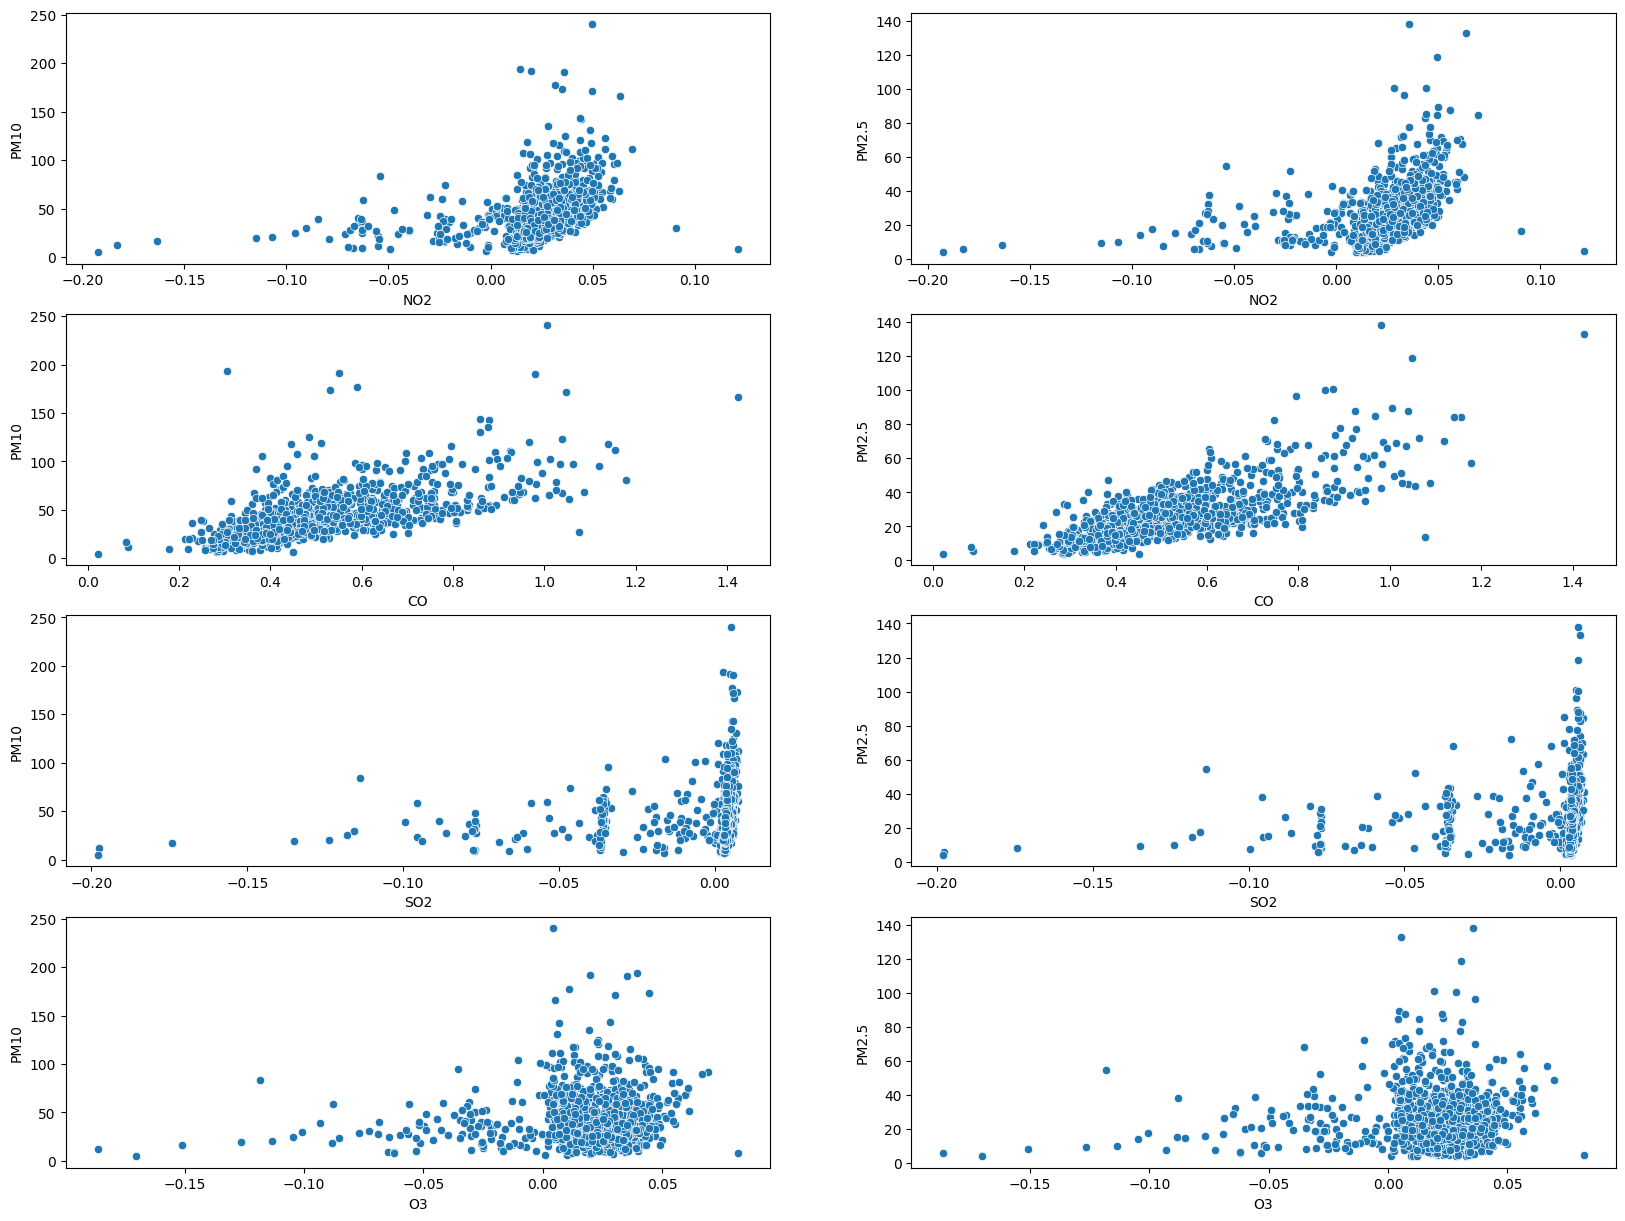

In [54]:
f, ax = plt.subplots(4, 2, figsize=(20,15))
sns.scatterplot(x='NO2', y= 'PM10', data=df_0, ax=ax[0,0])
sns.scatterplot(x='NO2', y= 'PM2.5', data=df_0, ax=ax[0,1])
sns.scatterplot(x='CO', y= 'PM10', data=df_0, ax=ax[1,0])
sns.scatterplot(x='CO', y= 'PM2.5', data=df_0, ax=ax[1,1])
sns.scatterplot(x='SO2', y= 'PM10', data=df_0, ax=ax[2,0])
sns.scatterplot(x='SO2', y= 'PM2.5', data=df_0, ax=ax[2,1])
sns.scatterplot(x='O3', y= 'PM10', data=df_0, ax=ax[3,0])
sns.scatterplot(x='O3', y= 'PM2.5', data=df_0, ax=ax[3,1])
plt.plot()

산점도를 보면 NO2, CO의 값이 미세먼지, 초미세먼지의 농도와 상관관계가 높음을 확인할 수 있음.

따라서 대기오염은 NO2, CO의 값에 영향을 받고, 특히 CO는 대기오염에 많은 영향을 끼치는 것을 알 수 있음.

[]

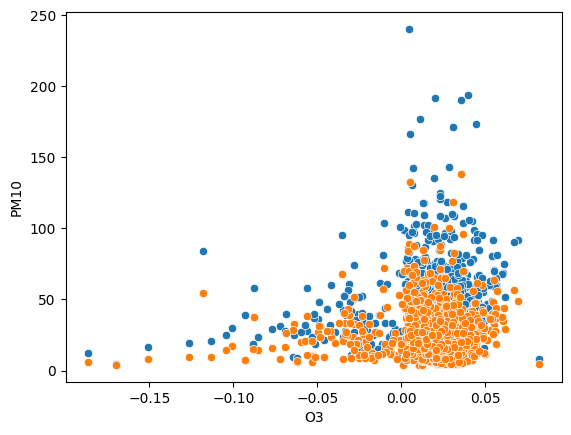

In [55]:
sns.scatterplot(x='O3', y= 'PM10', data=df_0)
sns.scatterplot(x='O3', y= 'PM2.5', data=df_0)
plt.plot()

O3의 농도에 따른 대기오염의 영향은 적은 것으로 보여짐.

[]

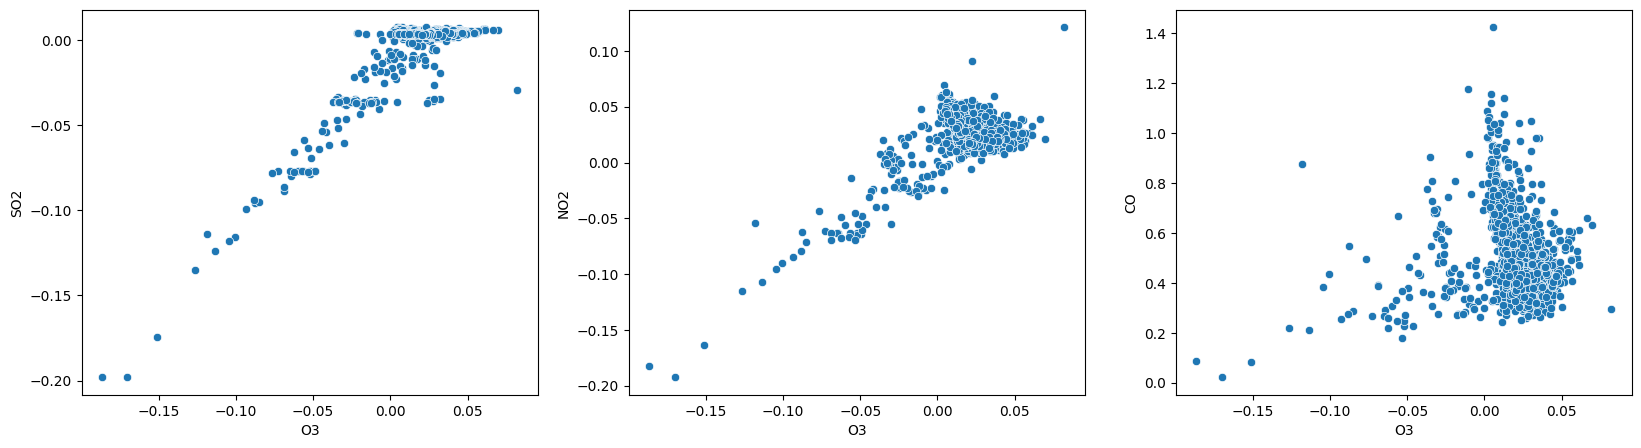

In [56]:
f, ax = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='O3', y= 'SO2', data=df_0, ax=ax[0])
sns.scatterplot(x='O3', y= 'NO2', data=df_0, ax=ax[1])
sns.scatterplot(x='O3', y= 'CO', data=df_0, ax=ax[2])
plt.plot()

그러나 O3는 SO2, NO2와 높은 상관관계를 보이며 경향성을 보여주는 것으로 판단됨.

즉, O3는 대기오염에 직접적인 영향을 주는 것처럼 보이진 않지만, SO2, NO2에 영향을 주어 간접적으로 대기오염에 영향을 미치는 것으로 판단.